16 de janeiro de 2025

In [18]:
# Importanto as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [19]:
# Lendo todos os arquivos

pasta = r'C:\Users\leti_\OneDrive\Documentos\python_env_app\Trabalho01'
arquivos = [ fname for fname in os.listdir(pasta) if fname.endswith('.csv')]
print(arquivos)

['data_janeiro_2025.csv']


In [20]:
# Criando DataFrame
df = []

for arq in arquivos:
    temp = pd.read_csv(os.path.join(pasta, arq), sep=';')
    df.append(temp)

# Concatenando em um DataFrame
df = pd.concat(df, ignore_index=True)

df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 00:50:00,0.0
1,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 01:20:00,0.0
2,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 02:20:00,0.0
3,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 03:30:00,0.0
4,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 04:20:00,0.0


In [21]:
# Convertendo para DateTime e criando data e hora separados

df['datahora'] = pd.to_datetime(df['datahora'])
df['data'] = df['datahora'].dt.date
df['hora'] = df['datahora'].dt.time

{df.rename(columns={'valorMedida':'precipitacao'}, inplace=True)}

df['precipitacao'] = pd.to_numeric(df['precipitacao'], errors='coerce')

df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,precipitacao,data,hora
0,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 00:50:00,0.0,2025-01-01,00:50:00
1,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 01:20:00,0.0,2025-01-01,01:20:00
2,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 02:20:00,0.0,2025-01-01,02:20:00
3,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 03:30:00,0.0,2025-01-01,03:30:00
4,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 04:20:00,0.0,2025-01-01,04:20:00


In [22]:
# Definindo a data do deslizamento - 16 de janeiro

df['data'] = pd.to_datetime(df['data'])
evento = pd.to_datetime("2025-01-17")
df_filtrado = df[df['data'] <= evento]

df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,precipitacao,data,hora
0,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 00:50:00,0.0,2025-01-01,00:50:00
1,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 01:20:00,0.0,2025-01-01,01:20:00
2,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 02:20:00,0.0,2025-01-01,02:20:00
3,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 03:30:00,0.0,2025-01-01,03:30:00
4,FLORIANOPOLIS,420540702A,SC,Coqueiros,"-27,599","-48,573",2025-01-01 04:20:00,0.0,2025-01-01,04:20:00


In [23]:
# Estatísticas básicas - média, desvio padrão, máximo e total acumulado em cada estação

estat = df_filtrado.groupby('nomeEstacao')['precipitacao'].agg(['mean', 'std', 'max', 'sum']).reset_index()
#print(estat)

# Criando tabela
estat = estat.rename(columns={
    'nomeEstacao': 'Estação',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'max': 'Máximo',
    'sum': 'Acumulado'
})

# Personalizando
estat_styled = (
    estat.style
        .format({
        'Média': '{:.2f}',
        'Desvio Padrão': '{:.2f}',
        'Máximo': '{:.2f}',
        'Acumulado': '{:.2f}'
    })
    .set_caption("<div style='text-align:center; font-weight:bold; font-size:18px;'>Estatísticas básicas de precipitação</div>")
    .set_table_styles([
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('background-color', '#f2f2f2')]},
        {'selector': 'th.col0', 'props': [('width', '110px')]},
        {'selector': 'th.col1', 'props': [('width', '100px')]},
        {'selector': 'th.col2', 'props': [('width', '100px')]},
        {'selector': 'th.col3', 'props': [('width', '100px')]},
        {'selector': 'th.col4', 'props': [('width', '100px')]},
    ])
    .hide(axis='index')
)
estat_styled

Estação,Média,Desvio Padrão,Máximo,Acumulado
Agronomica,0.65,1.88,13.85,355.16
Areias_Campeche,0.19,0.25,1.57,122.82
Coqueiros,0.61,1.76,13.42,340.03
Rio_Vermelho,0.13,0.18,0.98,83.84
Rodovia_SC406,0.44,0.74,6.10,274.21


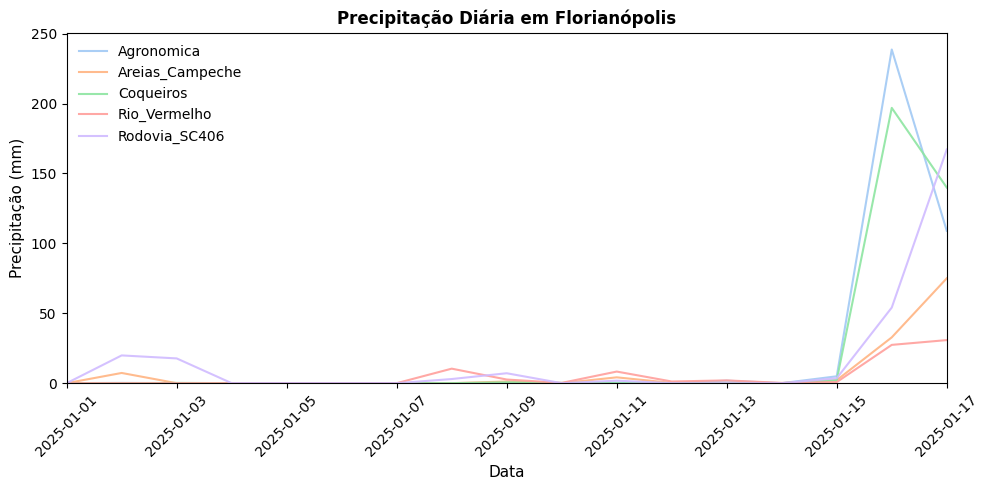

In [24]:
# Acumulado diário por estação
df_diario = df_filtrado.groupby(['nomeEstacao', 'data'], as_index=False)['precipitacao'].sum()

# Gráfico da precipitação diária

plt.figure(figsize=(10,5))

#paleta de cores
cores = sns.color_palette("pastel", len(df_diario['nomeEstacao'].unique()))

# Criando barras com cores diferentes
for est,cor in zip(df_diario['nomeEstacao'].unique(), cores):
    dados = df_diario[df_diario['nomeEstacao'] == est]
    plt.plot(dados['data'], dados['precipitacao'], label=est, color=cor, alpha=0.9)

# Personalização geral
plt.title('Precipitação Diária em Florianópolis', fontsize=12, fontweight='bold')
plt.xlabel('Data', fontsize=11)
plt.ylabel('Precipitação (mm)', fontsize=11)
plt.xlim(df_diario['data'].min(), df_diario['data'].max())
plt.ylim(0, df_diario['precipitacao'].max() * 1.05)
plt.xticks(rotation=45)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(r"C:\Users\Leti_\OneDrive\Documentos\python_env_app\outputs\precipitacao_diaria_janeiro.png")
plt.show()

In [26]:
# Acumulados móveis (3, 7 e 14 dias)

# Criando um dicionário para armazenar resultados
acum_evento = {}

# Calculando acumulado para cada estação
for estacao, grupo in df_filtrado.groupby('nomeEstacao'):
    grupo = grupo.sort_values('data')

    # Filtro dos últimos 3, 7 e 14 dias
    ultimos_14d = grupo[(grupo['data'] > evento - pd.Timedelta(days=14)) & (grupo['data'] <= evento)]
    ultimos_7d = grupo[(grupo['data'] > evento - pd.Timedelta(days=7)) & (grupo['data'] <= evento)]
    ultimos_3d = grupo[(grupo['data'] > evento - pd.Timedelta(days=3)) & (grupo['data'] <= evento)]

    acum_evento[estacao] = {
        'acum_14d': ultimos_14d['precipitacao'].sum(),
        'acum_7d': ultimos_7d['precipitacao'].sum(),
        'acum_3d': ultimos_3d['precipitacao'].sum()
    }

# Transformando o dicionário em dataframe
acum_evento_df = pd.DataFrame.from_dict(acum_evento, orient='index').reset_index()
acum_evento_df.rename(columns={'index': 'nomeEstacao'}, inplace=True)

#print(acum_evento_df)

# Criando tabela

# Renomeando colunas
acum_evento_df = acum_evento_df.rename(columns={
    'nomeEstacao': 'Estação',
    'acum_14d': '14 dias',
    'acum_7d': '7 dias',
    'acum_3d': '3 dias'
})
acum_evento_df_styled = (
    acum_evento_df.style
    .format({
        '14 dias': '{:.2f}',
        '7 dias': '{:.2f}',
        '3 dias': '{:.2f}'
    })
    .set_caption("<div style='text-align:center; font-weight:bold; font-size:18px;'>Acumulados de precipitação (mm)</div>")
    .set_table_styles([
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('background-color', '#f2f2f2')]},
        {'selector': 'th.col0', 'props': [('width', '110px')]},
        {'selector': 'th.col1', 'props': [('width', '100px')]},
        {'selector': 'th.col2', 'props': [('width', '100px')]},
        {'selector': 'th.col3', 'props': [('width', '100px')]},
        {'selector': 'th.col4', 'props': [('width', '100px')]},
    ])
    .hide(axis='index')
)
acum_evento_df_styled

#df.to_csv(r"C:\Users\leti_\OneDrive\Documentos\python_env_app\outputs"+'/'+'acumulado.csv')

Estação,14 dias,7 dias,3 dias
Agronomica,354.96,354.96,352.58
Areias_Campeche,115.52,114.32,109.95
Coqueiros,339.83,339.03,339.03
Rio_Vermelho,83.84,70.66,58.98
Rodovia_SC406,236.65,226.60,224.80


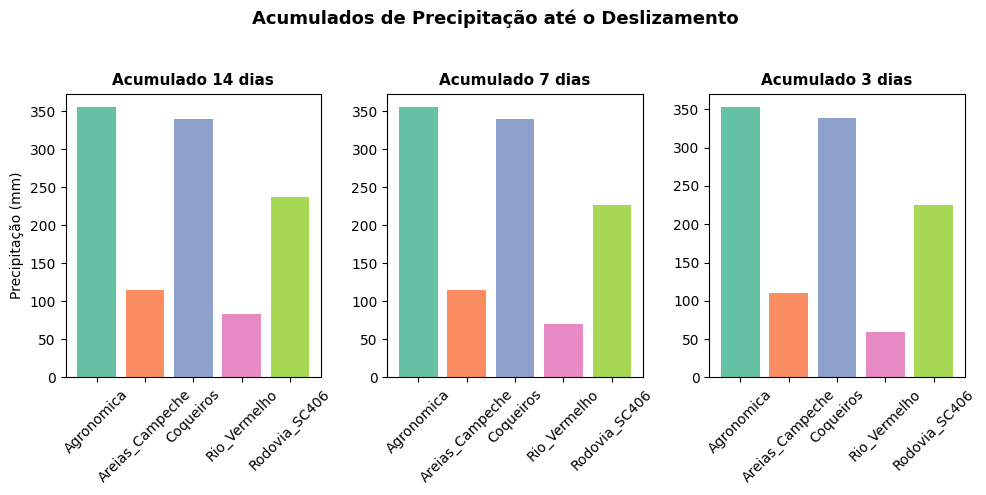

In [27]:
# Definindo linhas e colunas
colunas = ['14 dias', '7 dias', '3 dias']
titulos = ['Acumulado 14 dias', 'Acumulado 7 dias', 'Acumulado 3 dias']

# Escolhendo paleta de cores
cores = sns.color_palette("Set2", len(acum_evento_df))

# Criando figura com 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Gerando as barras
for i, (ax, col, titulo) in enumerate(zip(axes, colunas, titulos)):
    x = range(len(acum_evento_df['Estação']))
    ax.bar(x, acum_evento_df[col], color=cores)

    # Eixo X - centralizado e rotacionado
    ax.set_xticks(x)
    ax.set_xticklabels(acum_evento_df['Estação'], rotation=45, ha='center', fontsize=10)

    # Títulos e rótulos
    ax.set_title(titulo, fontsize=11, fontweight='bold')
    ax.set_ylabel('Precipitação (mm)' if i == 0 else "", fontsize=10)

# Título principal
fig.suptitle('Acumulados de Precipitação até o Deslizamento', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r"C:\Users\Leti_\OneDrive\Documentos\python_env_app\outputs\acumulado_dias_janeiro.png")
plt.show()

In [28]:
# Acumulados de 72, 48 e 24 horas

acum_evento_horas = {}

# Calculando acumulado para cada estação
for estacao, grupo in df_filtrado.groupby('nomeEstacao'):
    grupo = grupo.sort_values('data')

    # Filtro dos últimos 3, 7 e 13 dias antes do desastre
    hora_72 = grupo[(grupo['data'] > evento - pd.Timedelta(days=3)) & (grupo['data'] <= evento)]
    hora_48 = grupo[(grupo['data'] > evento - pd.Timedelta(days=2)) & (grupo['data'] <= evento)]
    hora_24 = grupo[(grupo['data'] > evento - pd.Timedelta(days=1)) & (grupo['data'] <= evento)]

    acum_evento_horas[estacao] = {
        'acum_72h': hora_72['precipitacao'].sum(),
        'acum_48h': hora_48['precipitacao'].sum(),
        'acum_24h': hora_24['precipitacao'].sum()
    }

# Transformando o dicionário em dataframe
acum_evento_horas_df = pd.DataFrame.from_dict(acum_evento_horas, orient='index').reset_index()
acum_evento_horas_df.rename(columns={'index': 'nomeEstacao'}, inplace=True)

#print(acum_evento_df)

# Criando tabela

# Renomeando colunas
acum_evento_horas_df = acum_evento_horas_df.rename(columns={
    'nomeEstacao': 'Estação',
    'acum_72h': '72 horas',
    'acum_48h': '48 horas',
    'acum_24h': '24 horas'
})

# Personalizando
acum_evento_horas_df_styled = (
    acum_evento_horas_df.style
    .format({
        '72 horas': '{:.2f}',
        '48 horas': '{:.2f}',
        '24 horas': '{:.2f}'
    })
    .set_caption("<div style='text-align:center; font-weight:bold; font-size:18px;'>Acumulados de precipitação (mm)</div>")
    .set_table_styles([
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('background-color', '#f2f2f2')]},
        {'selector': 'th.col0', 'props': [('width', '110px')]},
        {'selector': 'th.col1', 'props': [('width', '100px')]},
        {'selector': 'th.col2', 'props': [('width', '100px')]},
        {'selector': 'th.col3', 'props': [('width', '100px')]},
        {'selector': 'th.col4', 'props': [('width', '100px')]},
    ])
    .hide(axis='index')
)
acum_evento_horas_df_styled

Estação,72 horas,48 horas,24 horas
Agronomica,352.58,347.66,108.98
Areias_Campeche,109.95,107.79,75.02
Coqueiros,339.03,336.85,139.92
Rio_Vermelho,58.98,58.20,30.81
Rodovia_SC406,224.80,221.25,167.17


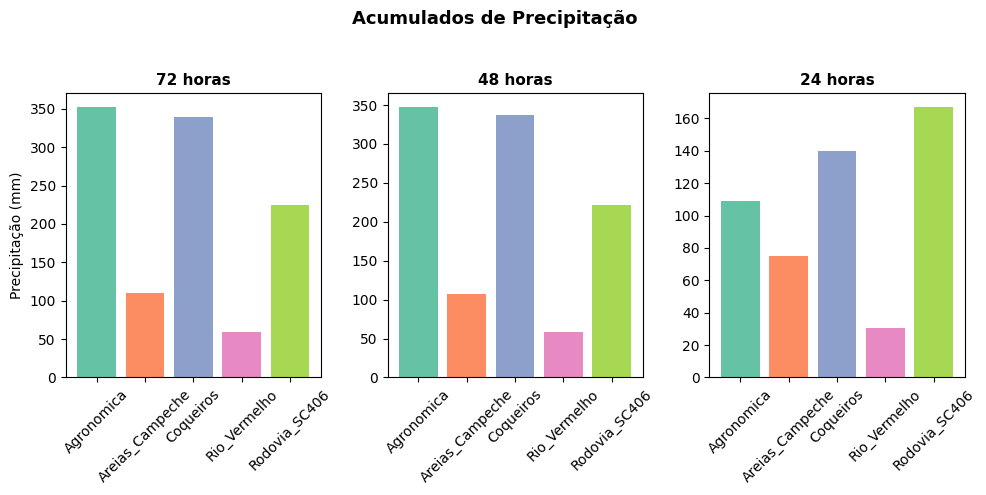

In [29]:
# Definindo linhas e colunas
colunashoras = ['72 horas', '48 horas', '24 horas']
tituloshoras = ['72 horas', '48 horas', '24 horas']

# Escolhendo paleta de cores 
coreshoras = sns.color_palette("Set2", len(acum_evento_horas_df))

# Criando figura com 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Gerando as barras
for i, (ax, colhora, titulohora) in enumerate(zip(axes, colunashoras, tituloshoras)):
    xhora = range(len(acum_evento_horas_df['Estação']))
    ax.bar(xhora, acum_evento_horas_df[colhora], color=coreshoras)

    # Eixo X - centralizado e rotacionado
    ax.set_xticks(xhora)
    ax.set_xticklabels(acum_evento_horas_df['Estação'], rotation=45, ha='center', fontsize=10)

    # Títulos e rótulos
    ax.set_title(titulohora, fontsize=11, fontweight='bold')
    ax.set_ylabel('Precipitação (mm)' if i == 0 else "", fontsize=10)

# Título principal
fig.suptitle('Acumulados de Precipitação', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r"C:\Users\Leti_\OneDrive\Documentos\python_env_app\outputs\acumulado_horas.png")
plt.show()

In [31]:
# Dicionário para guardar os acumulados diários
acum_evento_horas_2 = {}

# Definindo as datas que você quer
dias = {
    'acum_72horas': pd.to_datetime("2025-01-14"),
    'acum_48horas': pd.to_datetime("2025-01-15"),
    'acum_24horas': pd.to_datetime("2025-01-16")
}

# Calculando acumulado diário para cada estação
for estacao, grupo in df_filtrado.groupby('nomeEstacao'):
    grupo = grupo.sort_values('data')
    grupo['data'] = pd.to_datetime(grupo['data']).dt.date
    
    # Soma por dia
    soma_por_dia = grupo.groupby('data')['precipitacao'].sum()
    
    acum_evento_horas_2[estacao] = {
        'acum_72horas': soma_por_dia.get(pd.to_datetime("2025-01-14").date(), 0),
        'acum_48horas': soma_por_dia.get(pd.to_datetime("2025-01-15").date(), 0),
        'acum_24horas': soma_por_dia.get(pd.to_datetime("2025-01-16").date(), 0)
    }

# Transformando o dicionário em DataFrame
acum_evento_horas_2_df = pd.DataFrame.from_dict(acum_evento_horas_2, orient='index').reset_index()
acum_evento_horas_2_df.rename(columns={'index': 'nomeEstacao'}, inplace=True)
acum_evento_horas_2_df

# Criando tabela

# Renomeando colunas
acum_evento_horas_2_df = acum_evento_horas_2_df.rename(columns={
    'nomeEstacao': 'Estação',
    'acum_72horas': '72 horas',
    'acum_48horas': '48 horas',
    'acum_24horas': '24 horas'
})

# Personalizando
acum_evento_horas_2_df_styled = (
    acum_evento_horas_2_df.style
    .format({
        '72 horas': '{:.2f}',
        '48 horas': '{:.2f}',
        '24 horas': '{:.2f}'
    })
    .set_caption("<div style='text-align:center; font-weight:bold; font-size:18px;'>Acumulados de precipitação (mm)</div>")
    .set_table_styles([
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('background-color', '#f2f2f2')]},
        {'selector': 'th.col0', 'props': [('width', '110px')]},
        {'selector': 'th.col1', 'props': [('width', '100px')]},
        {'selector': 'th.col2', 'props': [('width', '100px')]},
        {'selector': 'th.col3', 'props': [('width', '100px')]},
        {'selector': 'th.col4', 'props': [('width', '100px')]},
    ])
    .hide(axis='index')
)
acum_evento_horas_2_df_styled

Estação,72 horas,48 horas,24 horas
Agronomica,0.00,4.92,238.68
Areias_Campeche,0.00,2.16,32.77
Coqueiros,0.00,2.18,196.93
Rio_Vermelho,0.20,0.78,27.39
Rodovia_SC406,0.00,3.55,54.08


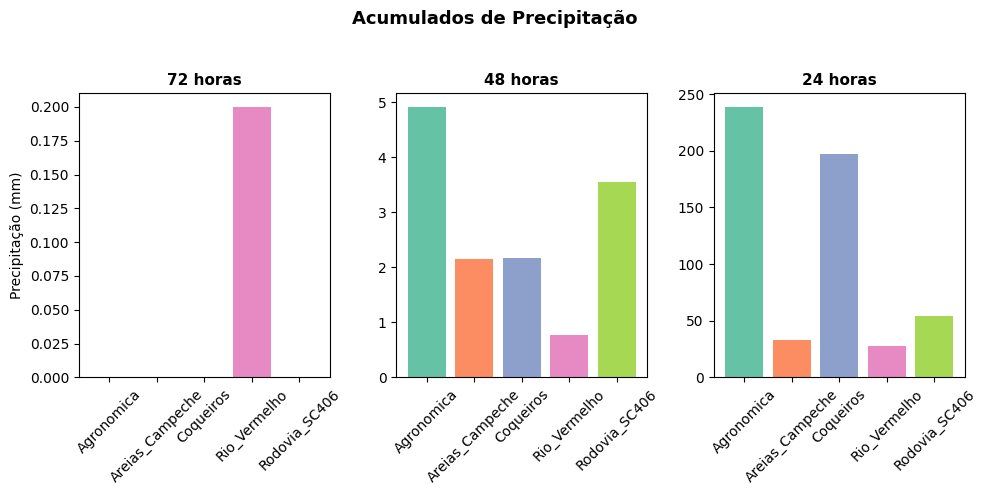

In [25]:
# Definindo linhas e colunas
colunashoras2 = ['72 horas', '48 horas', '24 horas']
tituloshoras2 = ['72 horas', '48 horas', '24 horas']

# Escolhendo paleta de cores 
coreshoras2 = sns.color_palette("Set2", len(acum_evento_horas_2_df))

# Criando figura com 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Gerando as barras
for i, (ax, colhora2, titulohora2) in enumerate(zip(axes, colunashoras2, tituloshoras2)):
    xhora2 = range(len(acum_evento_horas_2_df['Estação']))
    ax.bar(xhora, acum_evento_horas_2_df[colhora2], color=coreshoras2)

    # Eixo X - centralizado e rotacionado
    ax.set_xticks(xhora2)
    ax.set_xticklabels(acum_evento_horas_2_df['Estação'], rotation=45, ha='center', fontsize=10)

    # Títulos e rótulos
    ax.set_title(titulohora2, fontsize=11, fontweight='bold')
    ax.set_ylabel('Precipitação (mm)' if i == 0 else "", fontsize=10)

# Título principal
fig.suptitle('Acumulados de Precipitação', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r"C:\Users\Leti_\OneDrive\Documentos\python_env_app\outputs\acumulado_horas_2.png")
plt.show()